### UNIVERSIDADE FEDERAL DA PARAÍBA CENTRO DE INFORMÁTICA
|               |                                                                   |
|:--------------|:------------------------------------------------------------------|
| Disciplina:   | Aprendizagem de Máquina                                           |
| Semestre:     | 2024.2                                                            | 
| Professores:  | Bruno Jefferson de Sousa Pessoa e Gilberto Farias de Sousa Filho  |
| Aluno:        | Raniere Fernandes de Medeiros                                     | 


### Descrição das atividades do projeto

Implementar três classificadores de dígitos contidos no dataset MNIST Adaptado, utilizando os três modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão Linear e Regressão Logística. Detalhes da implementação estão descritos a seguir. 

Mais informações sobre o projeto podem ser encontradas no [documento do mini projeto](doc/Projeto_Reconhecimento_de_Digitos.pdf).


### Redução da dimensão das amostras

In [1]:
import pandas as pd

from src.constants import PATH_FILE_TRAIN_CSV, PATH_FILE_TEST_CSV
from src.image import intensity, symmetry

X_train = pd.read_csv(PATH_FILE_TRAIN_CSV, sep=';')
X_test = pd.read_csv(PATH_FILE_TEST_CSV, sep=';')

X_train.head()
X_test.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Intensidade dos pixels

In [2]:
from src import image

Intensity_train = image.intensity(X_train)
Intensity_test = image.intensity(X_test)

Symmetry_train = image.symmetry(X_train)
Symmetry_test = image.symmetry(X_test)

Nesta atividade, deve-se construir novos arquivos de treino e teste a serem chamados de train_redu.csv e test_redu.csv. 
Esses arquivos conterão 3 as seguintes colunas: label, intensidade e simetria.

In [3]:
Reduced_train = pd.DataFrame({'label': X_train['label'], 'intensidade': Intensity_train, 'simetria': Symmetry_train})
Reduced_test = pd.DataFrame({'label': X_test['label'], 'intensidade': Intensity_test, 'simetria': Symmetry_test})

Gerando os arquivos train_redu.csv e test_redu.csv

In [4]:
from src.constants import PATH_FILE_TRAIN_REDUCED_CSV, PATH_FILE_TEST_REDUCED_CSV

Reduced_train.to_csv(PATH_FILE_TRAIN_REDUCED_CSV, sep=';', index=False)
Reduced_test.to_csv(PATH_FILE_TEST_REDUCED_CSV, sep=';', index=False)

### Classificação dos dígitos 1 x 5

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(Reduced_train.drop('label', axis=1))  # Fit and transform
test_data_scaled = scaler.transform(Reduced_test.drop('label', axis=1))  # Only transform (prevents data leakage)

Reduced_train['normalized_i'] = train_data_scaled[:, 0]
Reduced_train['normalized_s'] = train_data_scaled[:, 1]

Reduced_test['normalized_i'] = test_data_scaled[:, 0]
Reduced_test['normalized_s'] = test_data_scaled[:, 1]

In [6]:
Reduced_train_1_5 = Reduced_train[Reduced_train.label.isin([1, 5])]
Reduced_test_1_5 = Reduced_test[Reduced_test.label.isin([1, 5])]

Reduced_train_1_5.label.value_counts()
Reduced_test_1_5.label.value_counts()

label
1    292
5    291
Name: count, dtype: int64

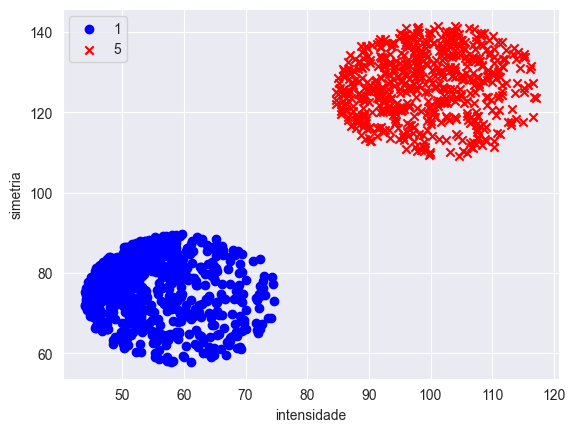

In [7]:
import matplotlib.pyplot as plt

intensity_1 = Reduced_train_1_5[Reduced_train_1_5.label.isin([1])].intensidade
symmetry_1 = Reduced_train_1_5[Reduced_train_1_5.label.isin([1])].simetria

intensity_5 = Reduced_train_1_5[Reduced_train_1_5.label.isin([5])].intensidade
symmetry_5 = Reduced_train_1_5[Reduced_train_1_5.label.isin([5])].simetria

plt.scatter(intensity_1, symmetry_1, color='blue', label='1', marker='o')
plt.scatter(intensity_5, symmetry_5, color='red', label='5', marker='x')

plt.xlabel('intensidade')
plt.ylabel('simetria')

plt.legend()
plt.show()


In [8]:
Reduced_train_1_5.reset_index(drop=True, inplace=True)
Reduced_train_1_5.head()

,label,intensidade,simetria,normalized_i,normalized_s
0,1,44.701961,69.270588,0.006349,0.110503
1,1,59.850980,83.443137,0.138219,0.247928
2,1,48.552941,79.043137,0.039872,0.205263
3,1,69.435294,72.878431,0.221649,0.145486
4,1,51.541176,84.611765,0.065884,0.259259


In [9]:
Reduced_test_1_5.reset_index(drop=True, inplace=True)
Reduced_test_1_5.head()

,label,intensidade,simetria,normalized_i,normalized_s
0,1,51.639216,71.443137,0.066737,0.131569
1,1,51.674510,85.050980,0.067044,0.263518
2,1,44.847059,72.674510,0.007612,0.143509
3,1,50.760784,81.945098,0.059091,0.233402
4,1,57.788235,72.564706,0.120264,0.142444


Construir o vetor 𝑋 = {(𝑖𝑛𝑡𝑒𝑛𝑠𝑖𝑑𝑎𝑑𝑒, 𝑠𝑖𝑚𝑒𝑡𝑟𝑖𝑎)} para toda imagem de train1x5. Atribuir o valor alvo 𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5;

In [10]:
import numpy as np

DIGIT_1 = 1
DIGIT_5 = 5

X_reduced_train_1_5 = Reduced_train_1_5[['normalized_i', 'normalized_s']].values
Y_reduced_train_1_5 = np.array([1 if y == DIGIT_1 else -1 for y in Reduced_train_1_5.label])

X_reduced_test_1_5 = Reduced_test_1_5[['normalized_i', 'normalized_s']].values
Y_reduced_test_1_5 = np.array([1 if y == DIGIT_1 else -1 for y in Reduced_test_1_5.label])

Criando o método de predição

In [11]:
import numpy as np
from typing import Union

# Função para prever o dígito com base nos valores de entrada
def predict_digit(labels: Union[np.ndarray, list]) -> np.ndarray:
    """
    Substitui os valores no array de labels:
    - Se o valor for igual a 1, ele permanece 1
    - Se o valor for diferente de 1, ele é substituído por 5

    :param labels: Array ou lista contendo os valores originais de labels
    :return: Um array NumPy onde os valores são 1 ou 5
    """
    # Substitui 1 por 1 e qualquer outro valor por 5
    transformed_labels: np.ndarray = np.where(labels == 1, 1, 5)
    
    # Retorna o array transformado
    return transformed_labels

#### Regressão Linear

In [12]:
from src.linear_regression import LinearRegressionClassifier


Treinando o classificador

In [13]:
# Instanciando o classificador
classifier = LinearRegressionClassifier()

# Treinando o classificador
classifier.train(X_reduced_train_1_5, Y_reduced_train_1_5)

# Predizendo os valores
pred_train = classifier.predict(X_reduced_train_1_5)

predict_digit_linear_regression = predict_digit(np.array(pred_train))

In [14]:
from src.linear_regression import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_1_5, Y_reduced_train_1_5)

y_pred = np.array(linear_regression.predict(X_reduced_train_1_5))

weights = linear_regression.get_weights()

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred = predict_digit(y_pred)

Plotando o gráfico

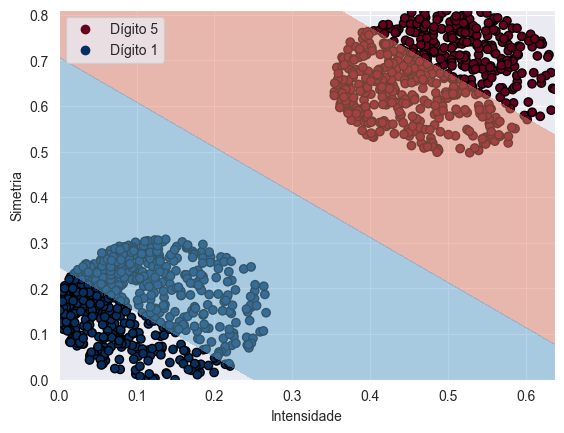

In [15]:
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
# X_reduced_train_1_5 contém as características reduzidas (primeira e segunda colunas)
# Y_reduced_train_1_5 contém os rótulos correspondentes
scatter = plt.scatter(
    X_reduced_train_1_5[:, 0],  # Primeira característica (eixo X)
    X_reduced_train_1_5[:, 1],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

# Cria uma malha de pontos no espaço bidimensional para fazer predições
xx, yy = np.meshgrid(
    np.linspace(X_reduced_train_1_5[:, 0].min(), X_reduced_train_1_5[:, 0].max(), 500),
    np.linspace(X_reduced_train_1_5[:, 1].min(), X_reduced_train_1_5[:, 1].max(), 500)
)

# Realiza predições utilizando os valores da malha xx, yy
# A malha é convertida em uma lista de coordenadas de pontos (xx.ravel(), yy.ravel()) para predição
Z = np.array(linear_regression.predict(np.c_[xx.ravel(), yy.ravel()]))

# Redimensiona a matriz Z para o formato da malha (xx.shape) para usar no gráfico de contornos
Z = Z.reshape(xx.shape)

# Desenha a fronteira de decisão usando contornos preenchidos
plt.contourf(
    xx, yy, Z, 
    alpha=0.5,        # Transparência do preenchimento
    cmap='RdBu',  # Mapa de cores para a fronteira de decisão
    levels=[-1, 0, 1] # Níveis para os contornos (categorias -1, 0, 1)
)

# Define rótulos dos eixos
plt.xlabel('Intensidade')  # Eixo X
plt.ylabel('Simetria')   # Eixo Y

# Adiciona a legenda ao gráfico
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])

# Exibe o gráfico
plt.show()

Testando o classificador

In [16]:
predictions_test = classifier.predict(X_reduced_test_1_5)
predictions_test_result = predict_digit(np.array(predictions_test))

Plotando o gráfico do teste

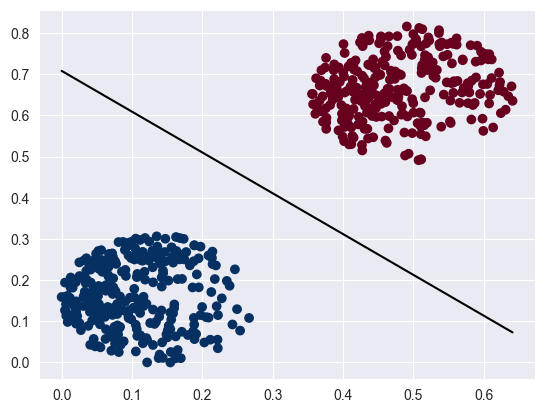

In [17]:
# Plot dos dados de teste com cores baseadas nas classes (y_test1x5)
plt.scatter(X_reduced_test_1_5[:, 0], X_reduced_test_1_5[:, 1], c=Y_reduced_test_1_5, cmap='RdBu')

# Cria uma linha para plotar a fronteira de decisão (100 pontos entre o mínimo e máximo de X_test1x5_rev[:, 0])
x = np.linspace(X_reduced_test_1_5[:, 0].min(), X_reduced_test_1_5[:, 0].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = classifier.get_decision_boundary(x)

# Plota a linha de regressão linear, que representa a fronteira de decisão
plt.plot(x, y, color='black')

# Exibe o gráfico final
plt.show()

In [18]:
from src.metric import compute_error

# Computing in-sample error (Ein)
eIn: float = compute_error(y_pred, Reduced_train_1_5.label.tolist())
print(f"{eIn=}")

# Computing out-of-sample error (Eout)
eOut: float = compute_error(predictions_test_result, Reduced_test_1_5.label.tolist())
print(f"{eOut=}")

eIn=0.0
eOut=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



<Axes: >

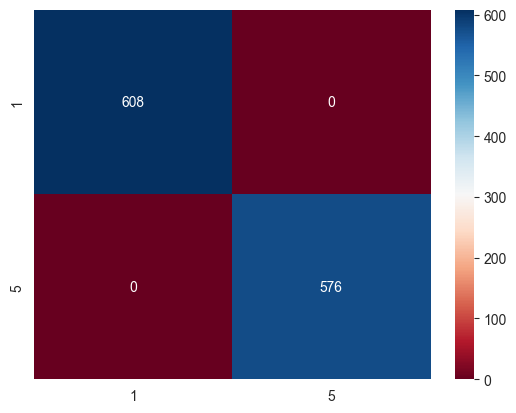

In [19]:
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns

# Relatório de eficácia de classificação
linear_regression_classification_report_train = classification_report(Reduced_train_1_5.label, y_pred)
print(f"{linear_regression_classification_report_train}")

# Matriz de confusão
linear_regression_conf_matrix_train = confusion_matrix(Reduced_train_1_5.label, y_pred)
sns.heatmap(linear_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



<Axes: >

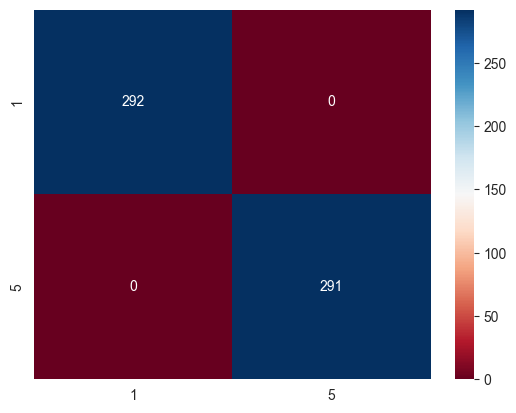

In [20]:
linear_regression_classification_report_test = classification_report(Reduced_test_1_5.label, predictions_test_result)
print(f"{linear_regression_classification_report_test}")

# Matriz de confusão
linear_regression_conf_matrix_test = confusion_matrix(Reduced_test_1_5.label, predictions_test_result)
sns.heatmap(linear_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

#### Perceptron

In [21]:
from src.perceptron import PocketPLA

# Instanciando o classificador
pocket_pla = PocketPLA()


Treinando o classificador

In [22]:
# adicionando coluna de bias
X_reduced_train_1_5_pla = np.column_stack((np.ones((len(X_reduced_train_1_5), 1)), X_reduced_train_1_5))

# Treinando o classificador
pocket_pla.execute(X_reduced_train_1_5_pla, Y_reduced_train_1_5)

# Predizendo os valores
from src.perceptron import pocket_pla_prediction

pred_train_pla = pocket_pla_prediction(pocket_pla, X_reduced_train_1_5_pla)

In [23]:
weights_pla = pocket_pla.get_weights()

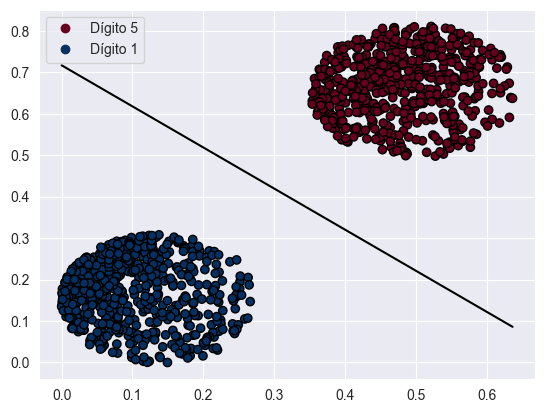

In [24]:
# Plotando o gráfico

plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_train_1_5_pla[:, 1],  # Primeira característica (eixo X)
    X_reduced_train_1_5_pla[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_train_1_5_pla[:, 1].min(), X_reduced_train_1_5_pla[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

Testando o classificador

In [25]:
# adicionando coluna de bias
X_reduced_test_1_5_pla = np.column_stack((np.ones((len(X_reduced_test_1_5), 1)), X_reduced_test_1_5))

# Predizendo os valores
pred_test_pla = pocket_pla_prediction(pocket_pla, X_reduced_test_1_5_pla)

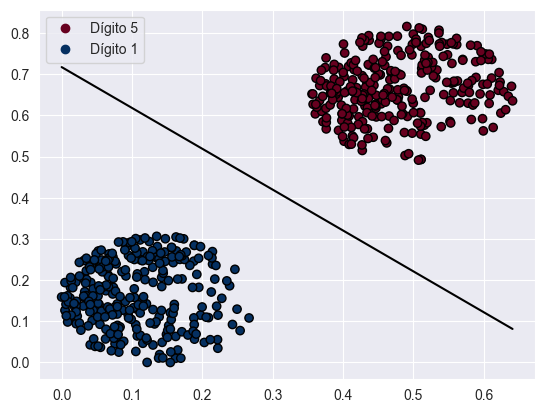

In [26]:
# Plotando o gráfico

plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_test_1_5_pla[:, 1],  # Primeira característica (eixo X)
    X_reduced_test_1_5_pla[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_test_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_test_1_5_pla[:, 1].min(), X_reduced_test_1_5_pla[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

In [27]:
# Computing in-sample error (Ein)
eIn_pla: float = compute_error(pred_train_pla, Reduced_train_1_5.label.tolist())
print(f"{eIn_pla=}")

# Computing out-of-sample error (Eout)
eOut_pla: float = compute_error(pred_test_pla, Reduced_test_1_5.label.tolist())
print(f"{eOut_pla=}")

eIn_pla=0.0
eOut_pla=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       608
           5       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



<Axes: >

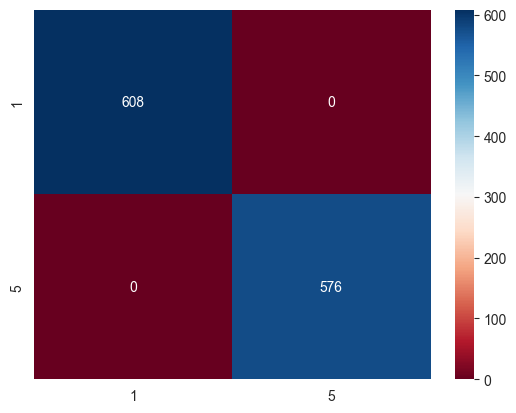

In [28]:
# Relatório de eficácia de classificação
perceptron_classification_report_train = classification_report(Reduced_train_1_5.label, pred_train_pla)
print(f"{perceptron_classification_report_train}")

# Matriz de confusão
perceptron_conf_matrix_train = confusion_matrix(Reduced_train_1_5.label, pred_train_pla)
sns.heatmap(perceptron_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



<Axes: >

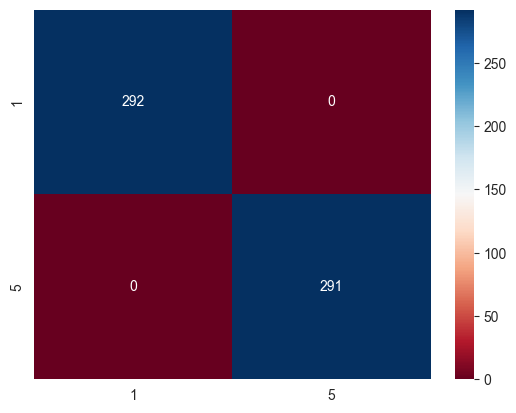

In [29]:
perceptron_classification_report_test = classification_report(Reduced_test_1_5.label, pred_test_pla)
print(f"{perceptron_classification_report_test}")

# Matriz de confusão
perceptron_conf_matrix_test = confusion_matrix(Reduced_test_1_5.label, pred_test_pla)
sns.heatmap(perceptron_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[1, 5], yticklabels=[1, 5])

#### Regressão Logística

In [30]:
from src.logistic_regression import LogisticRegression

# Instanciando o classificador
logistic_regression = LogisticRegression(max_iterations=2000)

Treinando o classificador

In [31]:
# adicionando coluna de bias
X_reduced_train_1_5_logistic = np.column_stack((np.ones((len(X_reduced_train_1_5), 1)), X_reduced_train_1_5))

# Treinando o classificador
logistic_regression.train(X_reduced_train_1_5_logistic, Y_reduced_train_1_5)

# Predizendo os valores
y_pred_logistic = logistic_regression.predict_probabilities(X_reduced_train_1_5_logistic)

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred_logistic_binary = logistic_regression.predict_classes(X_reduced_train_1_5_logistic)

Plotando o gráfico

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


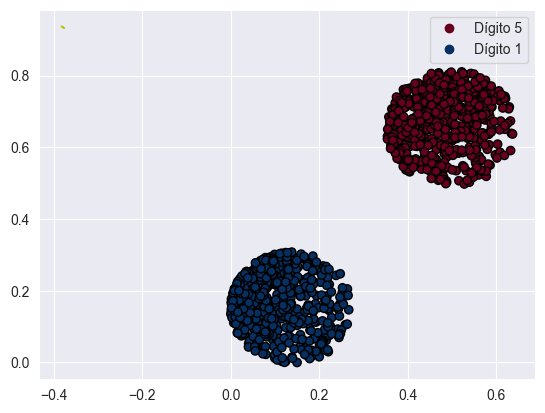

In [83]:
# Definindo os limites mínimo e máximo da primeira coluna do conjunto de treino reduzido
x_min_value = X_reduced_train_1_5_logistic[:, 1].min()
x_max_value = X_reduced_train_1_5_logistic[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))))[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_train_1_5_logistic[:, 1],  # Primeira característica (eixo X)
    X_reduced_train_1_5_logistic[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_train_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)
  
plt.plot(x_normalized_values, y_decision_boundary_values, 'y-', label='g(.)')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 1'])
plt.show()

Testando o classificador

In [33]:
X_reduced_test_1_5_logistic = np.column_stack((np.ones((len(X_reduced_test_1_5), 1)), X_reduced_test_1_5))

# Predizendo os valores
y_pred_test_logistic = logistic_regression.predict_probabilities(X_reduced_test_1_5_logistic)

# Converte as previsões contínuas para classes binárias (1 e 5)
y_pred_test_logistic_binary = logistic_regression.predict_classes(X_reduced_test_1_5_logistic)

Plotando o gráfico

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


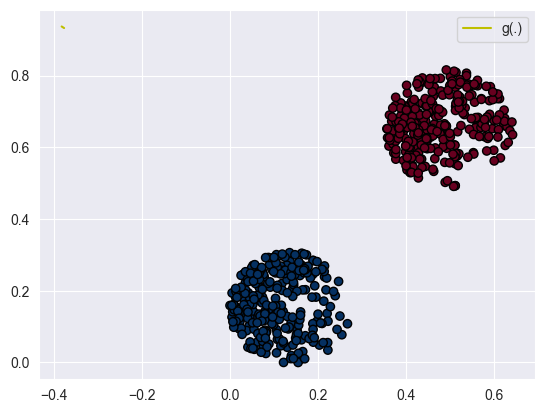

In [34]:
# Plotando o gráfico

plt.figure()

x_min_value = X_reduced_test_1_5_logistic[:, 1].min()
x_max_value = X_reduced_test_1_5_logistic[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))))[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_test_1_5_logistic[:, 1],  # Primeira característica (eixo X)
    X_reduced_test_1_5_logistic[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_test_1_5,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

plt.plot(x_normalized_values, y_decision_boundary_values, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

Computando o erro

In [35]:
# Computing in-sample error (Ein)
eIn_logistic: float = compute_error(y_pred_logistic_binary, Y_reduced_train_1_5)
print(f"{eIn_logistic=}")

# Computing out-of-sample error (Eout)
eOut_logistic: float = compute_error(y_pred_test_logistic_binary, Y_reduced_test_1_5)
print(f"{eOut_logistic=}")

eIn_logistic=0.0
eOut_logistic=0.0


Gerar a matriz de confusão e os relatórios de eficácia de classificação

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



<Axes: >

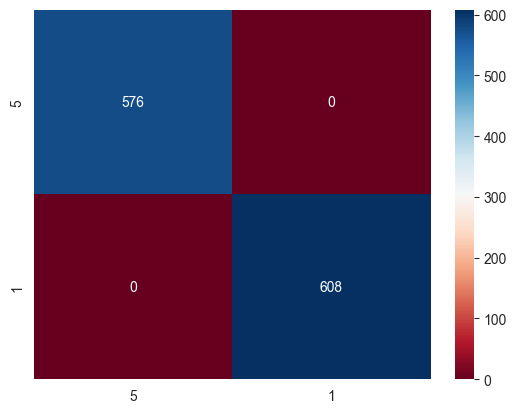

In [36]:
# Relatório de eficácia de classificação
logistic_regression_classification_report_train = classification_report(Y_reduced_train_1_5.tolist(), y_pred_logistic_binary)
print(f"{logistic_regression_classification_report_train}")

# Matriz de confusão
logistic_regression_conf_matrix_train = confusion_matrix(Y_reduced_train_1_5.tolist(), y_pred_logistic_binary)
sns.heatmap(logistic_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 1], yticklabels=[5, 1])

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



<Axes: >

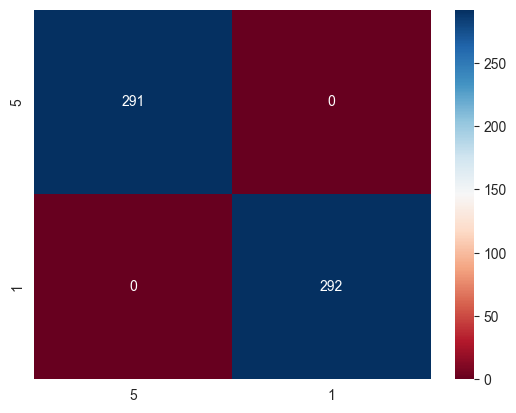

In [37]:
# Relatório de eficácia de classificação
logistic_regression_classification_report_test = classification_report(Y_reduced_test_1_5.tolist(), y_pred_test_logistic_binary)
print(f"{logistic_regression_classification_report_test}")

# Matriz de confusão
logistic_regression_conf_matrix_test = confusion_matrix(Y_reduced_test_1_5.tolist(), y_pred_test_logistic_binary)
sns.heatmap(logistic_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 1], yticklabels=[5, 1])

### Conclusão na classificação dos dígitos 1 e 5

Os classificadores Perceptron, Regressão Linear e Regressão Logística foram implementados e treinados com o dataset MNIST Adaptado. A partir dos resultados obtidos, foi possível observar que os classificadores apresentaram desempenho satisfatório na classificação dos dígitos 1 e 5.

O classificador Perceptron obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Linear obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste. O classificador Regressão Logística obteve um erro de classificação de 0.0% para o conjunto de treino e 0.0% para o conjunto de teste.

Os resultados obtidos demonstram que os classificadores implementados foram capazes de aprender a fronteira de decisão entre os dígitos 1 e 5, obtendo uma classificação precisa para ambos os conjuntos de dados. Portanto, os classificadores Perceptron, Regressão Linear e Regressão Logística são eficazes na classificação dos dígitos 1 e 5 do dataset MNIST Adaptado.

### Classificador de dígitos completo

In [38]:
# Carregando os dados reduzidos
DIGIT_0 = 0

X_reduced_train_digit_0 = Reduced_train[['intensidade', 'simetria']].values
Y_reduced_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

X_reduced_test_digit_0 = Reduced_test[['intensidade', 'simetria']].values
Y_reduced_test_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_test.label])

#### Regressão Linear

In [39]:
classifier_digit_0 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_0.train(X_reduced_train_digit_0, Y_reduced_train_digit_0)

# Predizendo os valores
pred_train = classifier_digit_0.predict(X_reduced_train_digit_0)

predict_digit_linear_regression = predict_digit(np.array(pred_train))

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_0, Y_reduced_train_digit_0)

y_pred_digit_0 = np.array(linear_regression.predict(X_reduced_train_digit_0))

weights = linear_regression.get_weights()

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_0 = np.where(y_pred_digit_0 >= 0, 1, -1)

Plotando o gráfico

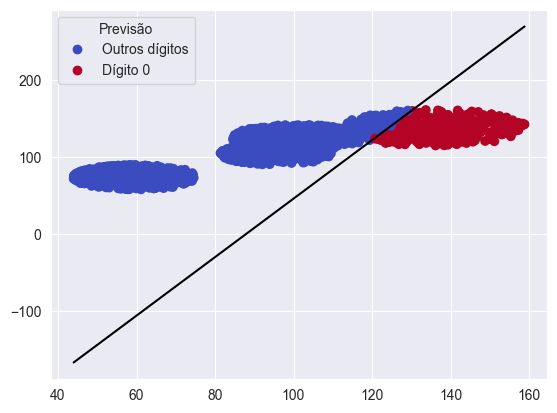

In [40]:
scatter = plt.scatter(X_reduced_train_digit_0[:, 0], X_reduced_train_digit_0[:, 1], c=y_pred_digit_0, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_0[:, 0].min(), X_reduced_train_digit_0[:, 0].max(), 100)
y = classifier_digit_0.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 0'], title='Previsão')
plt.show()

In [41]:
Reduced_train_digit_without_0 = Reduced_train[y_pred_digit_0 == -1]

X_reduced_train_digit_1 = Reduced_train_digit_without_0[["intensidade", "simetria"]].values
Y_reduced_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0['label']])

In [42]:
classifier_digit_1 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_1.train(X_reduced_train_digit_1, Y_reduced_train_digit_1)

# Predizendo os valores
pred_train = classifier_digit_1.predict(X_reduced_train_digit_1)

predict_digit_linear_regression = predict_digit(np.array(pred_train))

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_1, Y_reduced_train_digit_1)

y_pred_digit_1 = np.array(linear_regression.predict(X_reduced_train_digit_1))

weights = linear_regression.get_weights()

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_1 = np.where(y_pred_digit_1 >= 0, 1, -1)

Plotando o gráfico

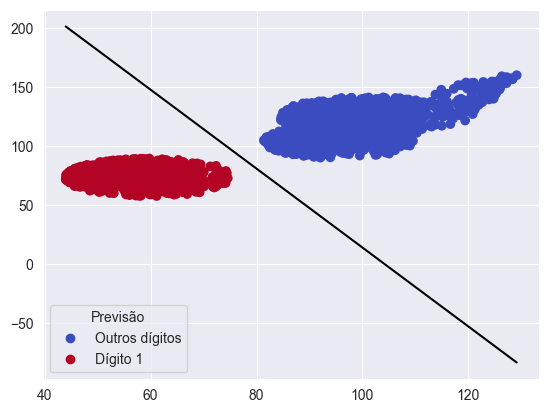

In [43]:
scatter = plt.scatter(X_reduced_train_digit_1[:, 0], X_reduced_train_digit_1[:, 1], c=y_pred_digit_1, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_1[:, 0].min(), X_reduced_train_digit_1[:, 0].max(), 100)
y = classifier_digit_1.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 1'], title='Previsão')
plt.show()

In [44]:
DIGIT_4 = 4

Reduced_train_digit_without_1 = Reduced_train_digit_without_0[y_pred_digit_1 == -1]

X_reduced_train_digit_4 = Reduced_train_digit_without_1[["intensidade", "simetria"]].values
Y_reduced_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

In [45]:
classifier_digit_4 = LinearRegressionClassifier()

# Treinando o classificador
classifier_digit_4.train(X_reduced_train_digit_4, Y_reduced_train_digit_4)

# Predizendo os valores
pred_train = classifier_digit_4.predict(X_reduced_train_digit_4)

predict_digit_linear_regression = predict_digit(np.array(pred_train))

linear_regression = LinearRegression()
linear_regression.fit(X_reduced_train_digit_4, Y_reduced_train_digit_4)

y_pred_digit_4 = np.array(linear_regression.predict(X_reduced_train_digit_4))

weights = linear_regression.get_weights()

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_digit_4 = np.where(y_pred_digit_4 >= 0, 1, -1)

Plotando o gráfico

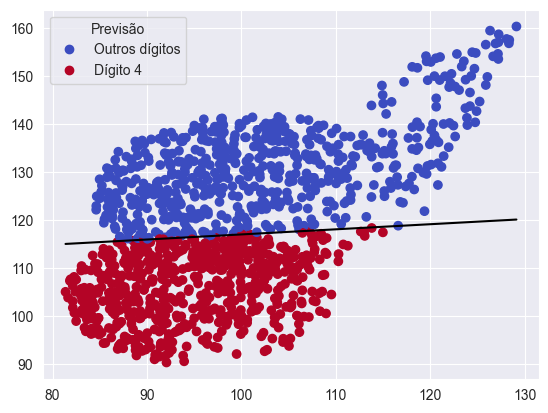

In [46]:
scatter = plt.scatter(X_reduced_train_digit_4[:, 0], X_reduced_train_digit_4[:, 1], c=y_pred_digit_4, cmap='coolwarm')

x = np.linspace(X_reduced_train_digit_4[:, 0].min(), X_reduced_train_digit_4[:, 0].max(), 100)
y = classifier_digit_4.get_decision_boundary(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 4'], title='Previsão')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       425
           1       1.00      1.00      1.00       608
           4       0.88      0.97      0.92       577
           5       0.81      0.87      0.84       576

    accuracy                           0.91      2186
   macro avg       0.92      0.90      0.91      2186
weighted avg       0.92      0.91      0.91      2186



<Axes: >

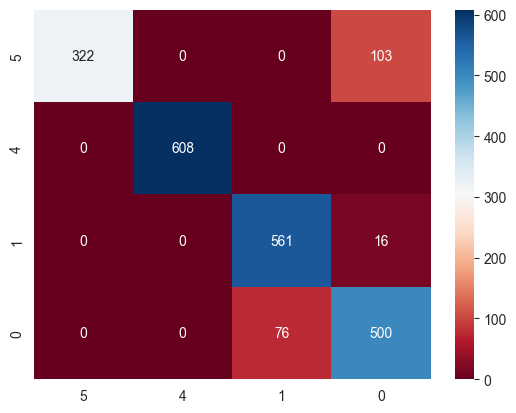

In [47]:
from src.classifier import DigitClassifier

# Instanciando o classificador
digit_classifier = DigitClassifier(classifier_digit_0, classifier_digit_1, classifier_digit_4, classifier_type="Linear")

feature_data = Reduced_train[['intensidade', 'simetria']].values
classified_train = [digit_classifier.classify_digit(imagem.reshape(1, -1)) for imagem in feature_data]

# Relatório de eficácia de classificação
linear_regression_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{linear_regression_classification_report_train}")

# Matriz de confusão
linear_regression_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
sns.heatmap(linear_regression_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 4, 1, 0], yticklabels=[5, 4, 1, 0])

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.92      0.99      0.95       314
           5       0.85      0.91      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



<Axes: >

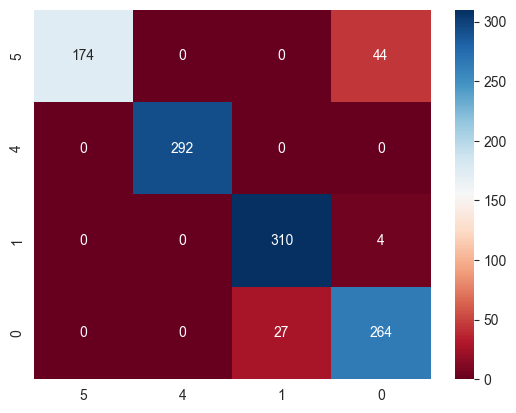

In [48]:
feature_data = Reduced_test[['intensidade', 'simetria']].values
classified_test = [digit_classifier.classify_digit(imagem.reshape(1, -1)) for imagem in feature_data]

# Relatório de eficácia de classificação
linear_regression_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{linear_regression_classification_report_test}")

# Matriz de confusão
linear_regression_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
sns.heatmap(linear_regression_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[5, 4, 1, 0], yticklabels=[5, 4, 1, 0])

In [49]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_LINEAR_REGRESSION_METRICS_JSON

with open(PATH_LINEAR_REGRESSION_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [50]:
ein = compute_error(classified_train, Reduced_train.label.tolist())
eout = compute_error(classified_test, Reduced_test.label.tolist())

print(f"{ein=}")
print(f"{eout=}")

ein=0.08920402561756635
eout=0.06726457399103136


### Perceptron

In [51]:
pocket_pla_digit_0 = PocketPLA()

In [52]:
# adicionando coluna de bias
X_reduced_pla_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Treinando o classificador
pocket_pla_digit_0.execute(X_reduced_pla_train_digit_0, Y_reduced_pla_train_digit_0)

# Predizendo os valores
#from src.perceptron import pocket_pla_prediction

pred_pla_train_digit_0 = pocket_pla_prediction(pocket_pla_digit_0, X_reduced_pla_train_digit_0)

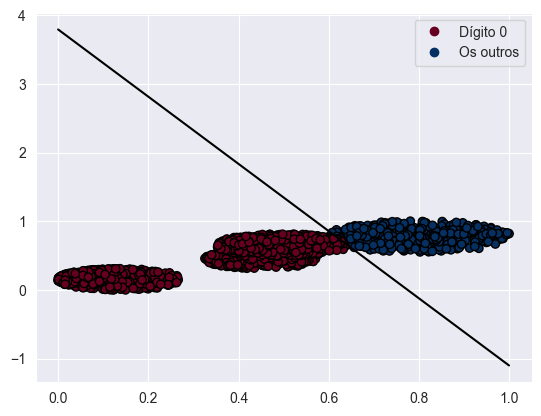

In [53]:
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_0[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_0[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_0,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_0[:, 1].min(), X_reduced_pla_train_digit_0[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_0.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 0', 'Os outros'])
plt.show()

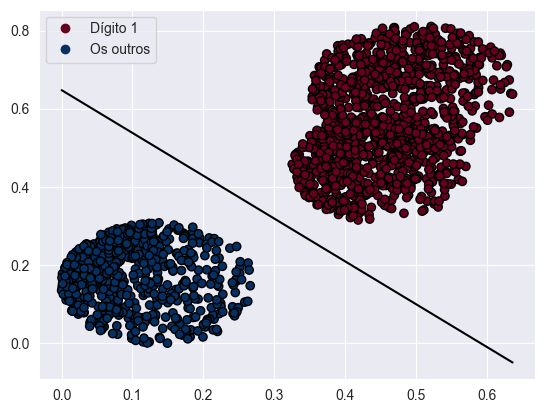

In [54]:
Reduced_train_digit_without_0 = Reduced_train[Y_reduced_pla_train_digit_0 == -1]

X_reduced_pla_train_digit_1 = np.column_stack((np.ones((len(Reduced_train_digit_without_0), 1)), Reduced_train_digit_without_0[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0.label])

# Treinando o classificador
pocket_pla_digit_1 = PocketPLA()
pocket_pla_digit_1.execute(X_reduced_pla_train_digit_1, Y_reduced_pla_train_digit_1)

pred_pla_train_digit_1 = pocket_pla_prediction(pocket_pla_digit_1, X_reduced_pla_train_digit_1)

# Plotando o gráfico
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_1[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_1[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_1,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_1[:, 1].min(), X_reduced_pla_train_digit_1[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_1.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 1', 'Os outros'])
plt.show()


pred_pla_train_digit_4=array([1, 1, 1, ..., 5, 5, 5])


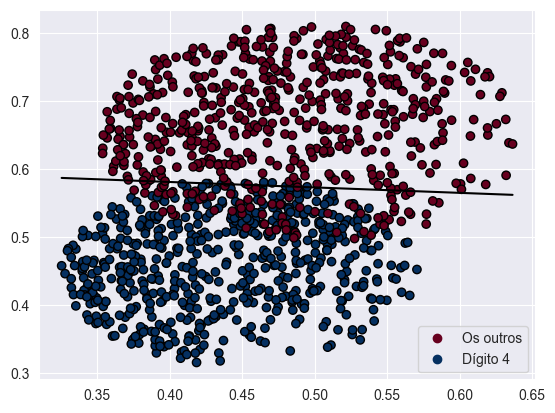

In [55]:
Reduced_train_digit_without_1 = Reduced_train_digit_without_0[Y_reduced_pla_train_digit_1 == -1]

X_reduced_pla_train_digit_4 = np.column_stack((np.ones((len(Reduced_train_digit_without_1), 1)), Reduced_train_digit_without_1[['normalized_i', 'normalized_s']].values))
Y_reduced_pla_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

# Treinando o classificador
pocket_pla_digit_4 = PocketPLA()
pocket_pla_digit_4.execute(X_reduced_pla_train_digit_4, Y_reduced_pla_train_digit_4)

pred_pla_train_digit_4 = pocket_pla_prediction(pocket_pla_digit_4, X_reduced_pla_train_digit_4)
print(f"{pred_pla_train_digit_4=}")

# Plotando o gráfico
plt.figure()

# Plota os dados reduzidos (características reduzidas para duas dimensões)
scatter = plt.scatter(
    X_reduced_pla_train_digit_4[:, 1],  # Primeira característica (eixo X)
    X_reduced_pla_train_digit_4[:, 2],  # Segunda característica (eixo Y)
    c=Y_reduced_pla_train_digit_4,      # Cor dos pontos com base nos rótulos (categorização)
    cmap='RdBu',        # Mapa de cores 'coolwarm' para distinguir as classes
    marker='o',             # Marcadores no formato circular
    edgecolor='k'           # Cor da borda dos marcadores (preto)
)

x = np.linspace(X_reduced_pla_train_digit_4[:, 1].min(), X_reduced_pla_train_digit_4[:, 1].max(), 100)

# Obtém os valores de y correspondentes à fronteira de decisão usando os pesos do classificador
y = pocket_pla_digit_4.get_original_y(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Os outros', 'Dígito 4'])
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       425
           1       1.00      1.00      1.00       608
           4       0.88      0.99      0.93       577
           5       0.98      0.86      0.92       576

    accuracy                           0.96      2186
   macro avg       0.96      0.96      0.96      2186
weighted avg       0.96      0.96      0.96      2186



<Axes: >

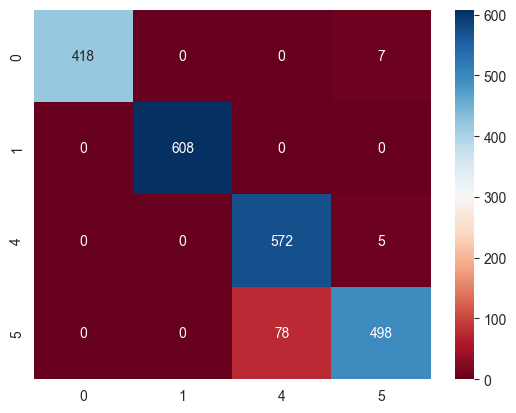

In [56]:
digit_classifier_pla = DigitClassifier(pocket_pla_digit_0, pocket_pla_digit_1, pocket_pla_digit_4, classifier_type="PLA")

feature_data = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
classified_train = [digit_classifier_pla.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
pla_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{pla_classification_report_train}")

# Matriz de confusão
pla_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
sns.heatmap(pla_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.98      0.89      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



<Axes: >

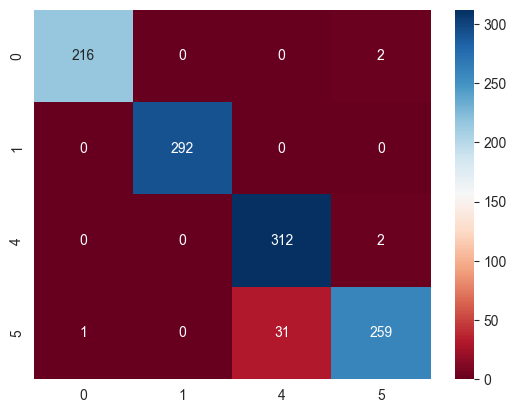

In [57]:
feature_data = np.column_stack((np.ones((len(Reduced_test), 1)), Reduced_test[['normalized_i', 'normalized_s']].values))
classified_test = [digit_classifier_pla.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
pla_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{pla_classification_report_test}")

# Matriz de confusão
pla_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
sns.heatmap(pla_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

In [58]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_PERCEPTRON_METRICS_JSON

with open(PATH_PERCEPTRON_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [59]:
ein_pla: float = compute_error(classified_train, Reduced_train.label.tolist())
print(f"{ein_pla=}")

eout_pla: float = compute_error(classified_test, Reduced_test.label.tolist())
print(f"{eout_pla=}")

ein_pla=0.04117108874656905
eout_pla=0.03228699551569503


### Regressão Logística

In [60]:
logistic_regression_digit_0 = LogisticRegression(max_iterations=2000)

# adicionando coluna de bias
X_reduced_logistic_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Treinando o classificador 
logistic_regression_digit_0.train(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0)

# Predizendo os valores
y_pred_logistic_train_digit_0 = logistic_regression_digit_0.predict_probabilities(X_reduced_logistic_train_digit_0)

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_logistic_train_digit_0 = logistic_regression_digit_0.predict_classes(X_reduced_logistic_train_digit_0)

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


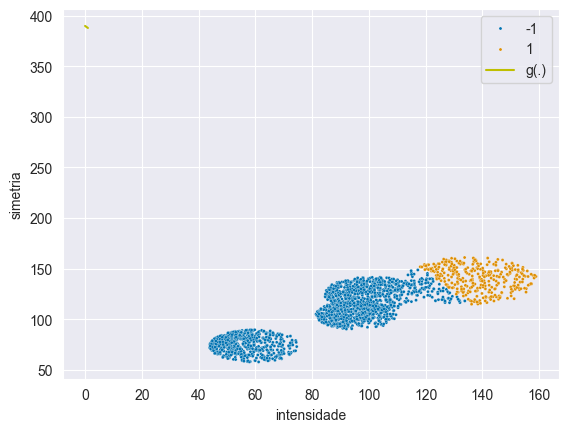

In [61]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_0[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_0[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_0.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_0.predict_classes(X_reduced_logistic_train_digit_0), data=Reduced_train, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [62]:
Reduced_train_digit_without_0 = Reduced_train[Y_reduced_logistic_train_digit_0 == -1]

X_reduced_logistic_train_digit_1 = np.column_stack((np.ones((len(Reduced_train_digit_without_0), 1)), Reduced_train_digit_without_0[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train_digit_without_0.label])

# Treinando o classificador
logistic_regression_digit_1 = LogisticRegression(max_iterations=2000)
logistic_regression_digit_1.train(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1)

# Predizendo os valores
y_pred_logistic_train_digit_1 = logistic_regression_digit_1.predict_probabilities(X_reduced_logistic_train_digit_1)

# Converte as previsões contínuas para classes binárias (1 e todos)
y_pred_logistic_train_digit_1 = logistic_regression_digit_1.predict_classes(X_reduced_logistic_train_digit_1)

x_min_value=np.float64(0.0)
x_max_value=np.float64(0.6365808698026899)


/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


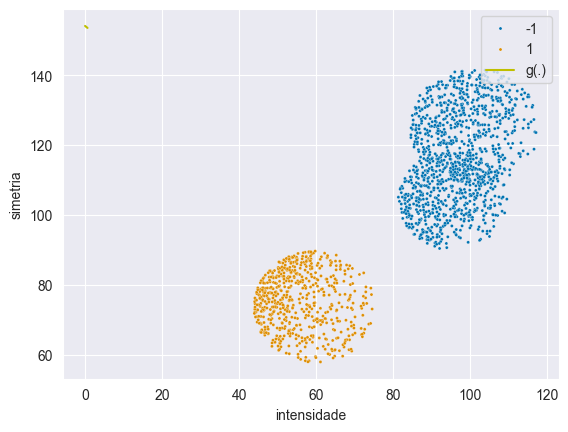

In [63]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_1[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_1[:, 1].max()
print(f"{x_min_value=}")
print(f"{x_max_value=}")

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_1.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_1.predict_classes(X_reduced_logistic_train_digit_1), data=Reduced_train_digit_without_0, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [64]:
Reduced_train_digit_without_1 = Reduced_train_digit_without_0[Y_reduced_logistic_train_digit_1 == -1]

X_reduced_logistic_train_digit_4 = np.column_stack((np.ones((len(Reduced_train_digit_without_1), 1)), Reduced_train_digit_without_1[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train_digit_without_1.label])

# Treinando o classificador
logistic_regression_digit_4 = LogisticRegression(max_iterations=2000)
logistic_regression_digit_4.train(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4)

# Predizendo os valores
y_pred_logistic_train_digit_4 = logistic_regression_digit_4.predict_probabilities(X_reduced_logistic_train_digit_4)

# Converte as previsões contínuas para classes binárias (4 e todos)
y_pred_logistic_train_digit_4 = logistic_regression_digit_4.predict_classes(X_reduced_logistic_train_digit_4)

/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


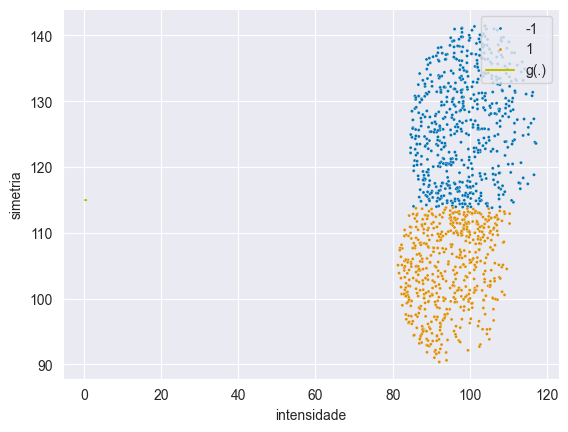

In [65]:
plt.figure()

x_min_value = X_reduced_logistic_train_digit_4[:, 1].min()
x_max_value = X_reduced_logistic_train_digit_4[:, 1].max()

# Gerando 100 valores de x igualmente espaçados entre x_min_value e x_max_value
x_range_values = np.linspace(x_min_value, x_max_value, 100)

# Normalizando os valores de x usando o scaler (a segunda
# coluna é zero para manter a consistência dimensional)
x_normalized_values = scaler.transform(np.column_stack((x_range_values, np.zeros_like(x_range_values))) )[:, 0]

# Calculando os valores de y correspondentes usando a fronteira de decisão do classificador
y_decision_boundary_values = [logistic_regression_digit_4.calculate_decision_boundary_y(x_normalized) for x_normalized in x_normalized_values]
y = scaler.inverse_transform(np.column_stack((x, y_decision_boundary_values)))[:, 1]

sns.scatterplot(x='intensidade', y='simetria', hue=logistic_regression_digit_4.predict_classes(X_reduced_logistic_train_digit_4), data=Reduced_train_digit_without_1, palette='colorblind', s=5)

plt.plot(x_range_values, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.77      0.87       425
           1       1.00      1.00      1.00       608
           4       0.93      0.89      0.91       577
           5       0.77      0.93      0.84       576

    accuracy                           0.91      2186
   macro avg       0.92      0.90      0.91      2186
weighted avg       0.92      0.91      0.91      2186



<Axes: >

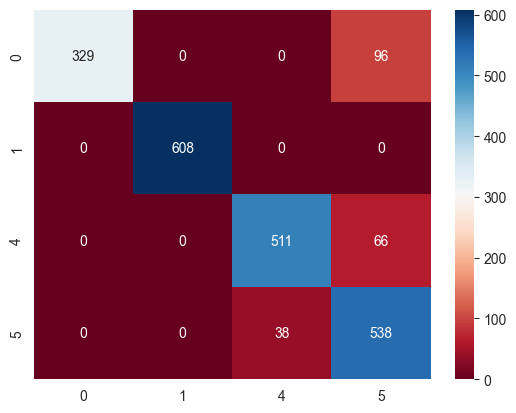

In [66]:
digit_classifier_logistic = DigitClassifier(logistic_regression_digit_0, logistic_regression_digit_1, logistic_regression_digit_4, classifier_type="Logistic")

feature_data = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
classified_train = [digit_classifier_logistic.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{logistic_classification_report_train}")

# Matriz de confusão
logistic_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
sns.heatmap(logistic_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])


              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.96      0.89      0.93       314
           5       0.79      0.96      0.86       291

    accuracy                           0.92      1115
   macro avg       0.94      0.91      0.92      1115
weighted avg       0.93      0.92      0.92      1115



<Axes: >

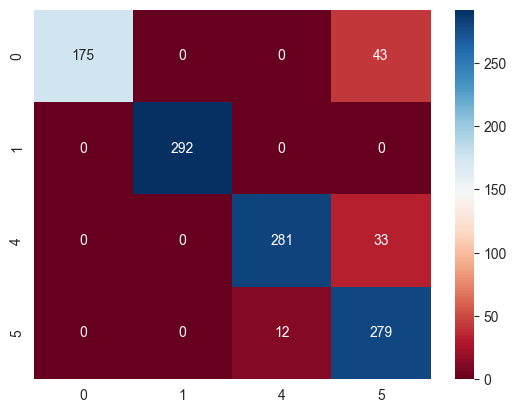

In [67]:
feature_data = np.column_stack((np.ones((len(Reduced_test), 1)), Reduced_test[['normalized_i', 'normalized_s']].values))
classified_test = [digit_classifier_logistic.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{logistic_classification_report_test}")

# Matriz de confusão
logistic_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
sns.heatmap(logistic_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

In [68]:
predictions_dict = {
    'train': classified_train,
    'test': classified_test,
}

import json
from src.constants import PATH_LOGISTIC_REGRESSION_METRICS_JSON

with open(PATH_LOGISTIC_REGRESSION_METRICS_JSON, 'w') as json_file:
    json.dump(predictions_dict, json_file)

In [69]:
ein_logistic = compute_error(classified_train, Reduced_train.label.tolist())
eout_logistic = compute_error(classified_test, Reduced_test.label.tolist())
print(f"{ein_logistic=}")
print(f"{eout_logistic=}")

ein_logistic=0.09149130832570906
eout_logistic=0.07892376681614355


In [70]:
# Linear
print(f"{linear_regression_classification_report_test}")

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.92      0.99      0.95       314
           5       0.85      0.91      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



In [71]:
# Perceptron
print(f"{pla_classification_report_test}")

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.98      0.89      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



In [72]:
# logistico
print(f"{logistic_classification_report_test}")

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.96      0.89      0.93       314
           5       0.79      0.96      0.86       291

    accuracy                           0.92      1115
   macro avg       0.94      0.91      0.92      1115
weighted avg       0.93      0.92      0.92      1115



### Conclusão na classificação dos dígitos 0, 1, 4 e 5

1. Comparação Geral

	Acurácia:
	    •	Perceptron: 0.97 (a maior entre os três modelos)
	    •	Regressão Linear: 0.93
	    •	Regressão Logística: 0.92
	
O Perceptron obteve a melhor acurácia geral, seguido de perto pela Regressão Linear e Regressão Logística. Isso indica que o Perceptron foi o mais eficaz na classificação geral dos quatro dígitos.

2. Comparação por Métrica

Precision

	Regressão Linear:
	    •	O modelo apresentou precision perfeita para os dígitos 0 e 1 (1.00), e resultados sólidos para os dígitos 4 (0.92) e 5 (0.85). Isso significa que ele foi muito preciso ao prever esses dígitos, embora a precisão para o dígito 5 tenha sido inferior comparado aos outros.
	Perceptron:
	    •	O Perceptron teve uma precision quase perfeita para todos os dígitos, com 1.00 para 0 e 1, e resultados próximos de 1.00 para os dígitos 4 (0.91) e 5 (0.98). Isso mostra uma excelente capacidade de prever corretamente os dígitos, com destaque para o dígito 5 (0.98).
	Regressão Logística:
	    •	A Regressão Logística teve precisão perfeita para os dígitos 0 e 1 (1.00), mas apresentou uma leve queda para os dígitos 4 (0.96) e 5 (0.79). A performance em relação ao dígito 5 foi a mais baixa dos três modelos.

Recall

	Regressão Linear:
	    •	O recall foi relativamente alto para todos os dígitos, com destaque para os dígitos 1 (1.00) e 4 (0.99), indicando que quase todas as instâncias desses dígitos foram corretamente identificadas. O dígito 0 teve um recall de 0.80, e o 5 teve 0.91.
	Perceptron:
	    •	O Perceptron teve um desempenho notável em recall, com quase 100% em todos os dígitos. O dígito 0 teve 0.99, e os demais (1, 4 e 5) também tiveram recall muito altos (1.00, 0.99, e 0.89, respectivamente).
	Regressão Logística:
	    •	Na Regressão Logística, o recall para o dígito 5 foi o melhor entre os três modelos (0.96), mas o recall para o dígito 0 foi baixo (0.80), o que mostra que o modelo teve dificuldade em identificar corretamente todas as instâncias do dígito 0.

F1-Score

	Regressão Linear:
	    •	O F1-score (média harmônica entre precision e recall) foi consistente, com 1.00 para o dígito 1 e 0.95 para o dígito 4. O dígito 0 teve um F1-score de 0.89, e o dígito 5 foi o ponto mais fraco com 0.88.
	Perceptron:
	    •	O Perceptron apresentou os melhores resultados, com F1-scores muito altos para todos os dígitos. Os dígitos 0 e 1 tiveram F1 de 0.99 e 1.00, respectivamente. O dígito 4 foi classificado com um excelente F1 de 0.95, e o dígito 5 teve um F1 de 0.94.
	Regressão Logística:
	    •	Para a Regressão Logística, o F1-score foi semelhante ao da Regressão Linear, mas com uma queda perceptível no dígito 5 (0.86). Os dígitos 0, 1, e 4 tiveram bons resultados (0.89, 1.00 e 0.93, respectivamente).

3. Conclusão

	Perceptron: Este modelo apresentou o melhor desempenho geral, com uma acurácia de 0.97 e ótimos valores de precision, recall, e f1-score para todos os dígitos. Ele foi especialmente eficaz ao prever os dígitos 0, 1, 4, e 5 com quase nenhuma falha.

	Regressão Linear: A Regressão Linear teve um desempenho sólido, com boa precisão e recall, especialmente para os dígitos 1 e 4. No entanto, apresentou resultados ligeiramente inferiores ao Perceptron, com um f1-score mais baixo para o dígito 5.

	Regressão Logística: A Reg Logística foi o modelo com a acurácia mais baixa (0.92), e teve dificuldades para prever corretamente o dígito 0 (com um recall de apenas 0.80) e o dígito 5 (com um F1-score de 0.86). Mesmo assim, foi competitivo para os dígitos 1 e 4, com valores de precisão e recall muito próximos dos outros modelos.

Em resumo, se a precisão global é o fator mais importante, o Perceptron se destaca como o melhor modelo. Se o foco for em desempenho consistente para todos os dígitos, a Regressão Linear também é uma escolha viável, mas com ligeiras desvantagens em relação ao Perceptron. Já a Regressão Logística, embora útil, parece ser a menos eficiente na classificação desses dígitos, especialmente para o dígito 0.

### Logistic Regression com weight decay (Regularização L2)

In [73]:
from src.logistic_regression_with_wd import tune_regularization_parameter

#MAX_ITERATIONS = 900
#WEIGHT_DECAY = 0.01

#logistic_regression_digit_0_weight_decay = LogisticRegressionWithWeightDecay(max_iterations=MAX_ITERATIONS, lambda_=WEIGHT_DECAY)

# adicionando coluna de bias
X_reduced_logistic_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Definir uma lista de valores de lambda para testar
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_regularization_parameter(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0, lambdas)
logistic_regression_digit_0_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_0_weight_decay.train(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0)

# Predizendo os valores
y_pred_logistic_train_digit_0_weight_decay = logistic_regression_digit_0_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_0)

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_logistic_train_digit_0_weight_decay = logistic_regression_digit_0_weight_decay.predict_classes(X_reduced_logistic_train_digit_0)

#logistic_regression_digit_1_weight_decay = LogisticRegressionWithWeightDecay(max_iterations=2000, lambda_=0.01)

# adicionando coluna de bias
X_reduced_logistic_train_digit_1 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train.label])

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_regularization_parameter(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1, lambdas)
logistic_regression_digit_1_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_1_weight_decay.train(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1)

# Predizendo os valores
y_pred_logistic_train_digit_1_weight_decay = logistic_regression_digit_1_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_1)

# Converte as previsões contínuas para classes binárias (1 e todos)
y_pred_logistic_train_digit_1_weight_decay = logistic_regression_digit_1_weight_decay.predict_classes(X_reduced_logistic_train_digit_1)

#logistic_regression_digit_4_weight_decay = LogisticRegressionWithWeightDecay(max_iterations=2000, lambda_=0.01)

# adicionando coluna de bias
X_reduced_logistic_train_digit_4 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train.label])

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_regularization_parameter(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4, lambdas)
logistic_regression_digit_4_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_4_weight_decay.train(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4)

# Predizendo os valores
y_pred_logistic_train_digit_4_weight_decay = logistic_regression_digit_4_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_4)

# Converte as previsões contínuas para classes binárias (4 e todos)
y_pred_logistic_train_digit_4_weight_decay = logistic_regression_digit_4_weight_decay.predict_classes(X_reduced_logistic_train_digit_4)

Treinando com lambda = 0.001
Acurácia na validação: 0.8972602739726028
Treinando com lambda = 0.01
Acurácia na validação: 0.815068493150685
Treinando com lambda = 0.1
Acurácia na validação: 0.7922374429223744
Treinando com lambda = 1
Acurácia na validação: 0.7922374429223744
Treinando com lambda = 10
Acurácia na validação: 0.7922374429223744
Treinando com lambda = 100
Acurácia na validação: 0.7922374429223744
Melhor lambda encontrado: 0.001 com acurácia de 0.8972602739726028
Treinando com lambda = 0.001
Acurácia na validação: 1.0
Treinando com lambda = 0.01
Acurácia na validação: 0.9634703196347032
Treinando com lambda = 0.1


/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))


Acurácia na validação: 0.723744292237443
Treinando com lambda = 1
Acurácia na validação: 0.723744292237443
Treinando com lambda = 10
Acurácia na validação: 0.723744292237443
Treinando com lambda = 100
Acurácia na validação: 0.723744292237443
Melhor lambda encontrado: 0.001 com acurácia de 1.0
Treinando com lambda = 0.001
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.01
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.1


/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow encountered in multiply
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: invalid value encountered in add
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)


Acurácia na validação: 0.7534246575342466
Treinando com lambda = 1
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 10
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 100
Acurácia na validação: 0.7534246575342466
Melhor lambda encontrado: 0.001 com acurácia de 0.7534246575342466


/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow encountered in multiply
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: invalid value encountered in add
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)


In [78]:
from src.logistic_regression_with_wd import tune_with_kfold


# adicionando coluna de bias
X_reduced_logistic_train_digit_0 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_0 = np.array([1 if y_ == DIGIT_0 else -1 for y_ in Reduced_train.label])

# Definir uma lista de valores de lambda para testar
#lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
lambdas = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_with_kfold(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0, lambdas)
logistic_regression_digit_0_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_0_weight_decay.train(X_reduced_logistic_train_digit_0, Y_reduced_logistic_train_digit_0)

# Predizendo os valores
y_pred_logistic_train_digit_0_weight_decay = logistic_regression_digit_0_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_0)

# Converte as previsões contínuas para classes binárias (0 e todos)
y_pred_logistic_train_digit_0_weight_decay = logistic_regression_digit_0_weight_decay.predict_classes(X_reduced_logistic_train_digit_0)

#logistic_regression_digit_1_weight_decay = LogisticRegressionWithWeightDecay(max_iterations=2000, lambda_=0.01)

# adicionando coluna de bias
X_reduced_logistic_train_digit_1 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_1 = np.array([1 if y_ == DIGIT_1 else -1 for y_ in Reduced_train.label])

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_regularization_parameter(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1, lambdas)
logistic_regression_digit_1_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_1_weight_decay.train(X_reduced_logistic_train_digit_1, Y_reduced_logistic_train_digit_1)

# Predizendo os valores
y_pred_logistic_train_digit_1_weight_decay = logistic_regression_digit_1_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_1)

# Converte as previsões contínuas para classes binárias (1 e todos)
y_pred_logistic_train_digit_1_weight_decay = logistic_regression_digit_1_weight_decay.predict_classes(X_reduced_logistic_train_digit_1)

#logistic_regression_digit_4_weight_decay = LogisticRegressionWithWeightDecay(max_iterations=2000, lambda_=0.01)

# adicionando coluna de bias
X_reduced_logistic_train_digit_4 = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
Y_reduced_logistic_train_digit_4 = np.array([1 if y_ == DIGIT_4 else -1 for y_ in Reduced_train.label])

# Chamar a função de ajuste de parâmetro de regularização
best_lambda, best_model = tune_regularization_parameter(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4, lambdas)
logistic_regression_digit_4_weight_decay = best_model

# Treinando o classificador
logistic_regression_digit_4_weight_decay.train(X_reduced_logistic_train_digit_4, Y_reduced_logistic_train_digit_4)

# Predizendo os valores
y_pred_logistic_train_digit_4_weight_decay = logistic_regression_digit_4_weight_decay.predict_probabilities(X_reduced_logistic_train_digit_4)

# Converte as previsões contínuas para classes binárias (4 e todos)
y_pred_logistic_train_digit_4_weight_decay = logistic_regression_digit_4_weight_decay.predict_classes(X_reduced_logistic_train_digit_4)

Lambda: 0.0001, Acurácia média: 0.8059360730593607
Lambda: 0.001, Acurácia média: 0.8059360730593607
Lambda: 0.005, Acurácia média: 0.8059360730593607
Lambda: 0.01, Acurácia média: 0.8059360730593607
Lambda: 0.05, Acurácia média: 0.8059360730593607
Lambda: 0.1, Acurácia média: 0.8059360730593607
Lambda: 0.5, Acurácia média: 0.8059360730593607
Lambda: 1, Acurácia média: 0.8059360730593607
Lambda: 5, Acurácia média: 0.8059360730593607
Lambda: 10, Acurácia média: 0.8059360730593607
Lambda: 50, Acurácia média: 0.8059360730593607


/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: 

Lambda: 100, Acurácia média: 0.8059360730593607
Melhor lambda encontrado: 0.0001 com acurácia média de 0.8059360730593607
Treinando com lambda = 0.0001
Acurácia na validação: 1.0
Treinando com lambda = 0.001
Acurácia na validação: 0.9931506849315068
Treinando com lambda = 0.005
Acurácia na validação: 0.9794520547945206
Treinando com lambda = 0.01
Acurácia na validação: 0.958904109589041
Treinando com lambda = 0.05
Acurácia na validação: 0.723744292237443
Treinando com lambda = 0.1
Acurácia na validação: 0.723744292237443
Treinando com lambda = 0.5
Acurácia na validação: 0.723744292237443
Treinando com lambda = 1
Acurácia na validação: 0.723744292237443
Treinando com lambda = 5
Acurácia na validação: 0.723744292237443
Treinando com lambda = 10
Acurácia na validação: 0.723744292237443
Treinando com lambda = 50


/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow encountered in multiply
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: invalid value encountered in add
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow

Acurácia na validação: 0.723744292237443
Treinando com lambda = 100
Acurácia na validação: 0.723744292237443
Melhor lambda encontrado: 0.0001 com acurácia de 1.0
Treinando com lambda = 0.0001
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.001
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.005
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.01
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.05
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.1
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 0.5
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 1
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 5
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 10
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 50
Acurácia na validação: 0.7534246575342466
Treinando com lambda = 100
Acurácia na validação: 0.7534246575342466
Melhor 

/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow encountered in multiply
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: invalid value encountered in add
  weights = weights + self.learning_rate * (gradient - self.lambda_ * weights)
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:57: RuntimeWarning: overflow encountered in exp
  gradient_sum += (label * feature_vector) / (1 + np.exp((label * weights).T @ feature_vector))
/Users/jusbrasil/Code/doutorado/ml-digit-at-ufpb/src/logistic_regression_with_wd.py:66: RuntimeWarning: overflow

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       425
           1       1.00      1.00      1.00       608
           4       0.00      0.00      0.00       577
           5       0.43      1.00      0.60       576

    accuracy                           0.65      2186
   macro avg       0.61      0.63      0.57      2186
weighted avg       0.58      0.65      0.57      2186



/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 

<Axes: >

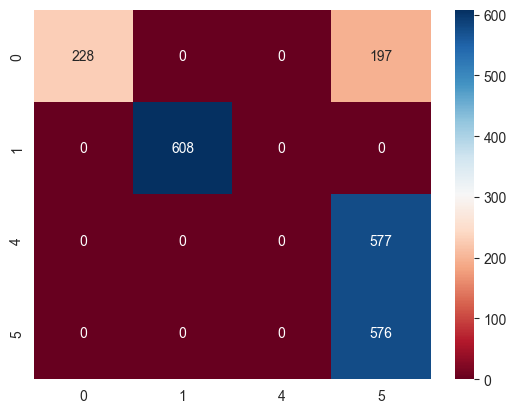

In [79]:
digit_classifier_logistic_weight_decay = DigitClassifier(logistic_regression_digit_0_weight_decay, logistic_regression_digit_1_weight_decay, logistic_regression_digit_4_weight_decay, classifier_type="Logistic")

feature_data = np.column_stack((np.ones((len(Reduced_train), 1)), Reduced_train[['normalized_i', 'normalized_s']].values))
classified_train = [digit_classifier_logistic_weight_decay.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_train = classification_report(Reduced_train.label.tolist(), classified_train)
print(f"{logistic_classification_report_train}")

# Matriz de confusão
logistic_conf_matrix_train = confusion_matrix(Reduced_train.label.tolist(), classified_train)
sns.heatmap(logistic_conf_matrix_train, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])

              precision    recall  f1-score   support

           0       1.00      0.55      0.71       218
           1       1.00      1.00      1.00       292
           4       0.00      0.00      0.00       314
           5       0.41      1.00      0.59       291

    accuracy                           0.63      1115
   macro avg       0.60      0.64      0.57      1115
weighted avg       0.57      0.63      0.55      1115



/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jusbrasil/Library/Caches/pypoetry/virtualenvs/ml-digit-at-ufpb-7uyM1Yaq-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 

<Axes: >

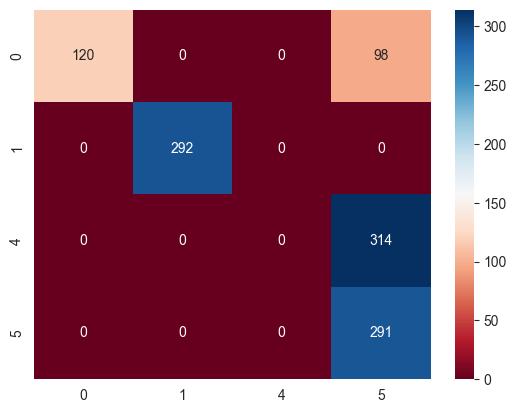

In [76]:
feature_data = np.column_stack((np.ones((len(Reduced_test), 1)), Reduced_test[['normalized_i', 'normalized_s']].values))
classified_test = [digit_classifier_logistic_weight_decay.classify_digit(imagem) for imagem in feature_data]

# Relatório de eficácia de classificação
logistic_classification_report_test = classification_report(Reduced_test.label.tolist(), classified_test)
print(f"{logistic_classification_report_test}")

# Matriz de confusão
logistic_conf_matrix_test = confusion_matrix(Reduced_test.label.tolist(), classified_test)
sns.heatmap(logistic_conf_matrix_test, annot=True, fmt='d', cmap='RdBu', xticklabels=[0, 1, 4, 5], yticklabels=[0, 1, 4, 5])